# Regression Analysis

In [ ]:
'''Here i have use the weight-height dataset and train the dataset using the linear regression method this is the basic machine learnig 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df=pd.read_csv("weight-height.csv")

In [8]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 0, 'Height')

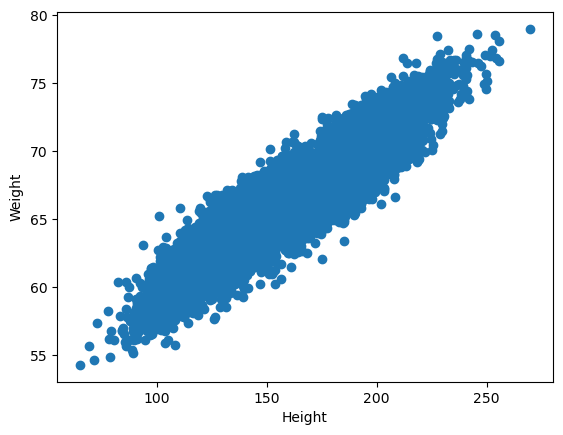

In [14]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel("Weight")
plt.xlabel("Height")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [16]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [17]:
# I want to check is there any missing value present in a given a dataset
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

## Divide our dataset into independent and dependent features

In [21]:
x=df[['Weight']] ## Independent feature
y=df['Height'] ## Dependent feature

In [23]:
x.shape,y.shape

((10000, 1), (10000,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
x_train.shape,x_test.shape

((8000, 1), (2000, 1))

In [28]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_train

array([[-1.26850469],
       [ 1.49950187],
       [ 1.23435095],
       ...,
       [-0.14126217],
       [ 0.56364485],
       [-0.34162408]])

In [33]:
x_test=scaler.transform(x_test)

In [34]:
x_test

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.1281409 ],
       [ 0.81914676],
       [-1.83691726]])

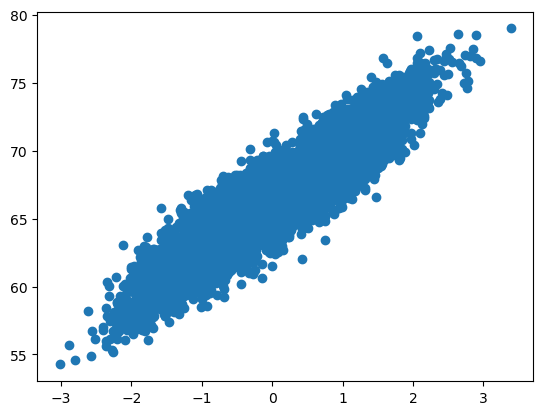

In [35]:
plt.scatter(x_train,y_train)

In [36]:
scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.53816571]])

## Model training

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()

In [39]:
## Training the train data 
regressor.fit(x_train,y_train)

LinearRegression()

In [41]:
regressor.intercept_

66.3596814074891

In [42]:
regressor.coef_

array([3.55479288])

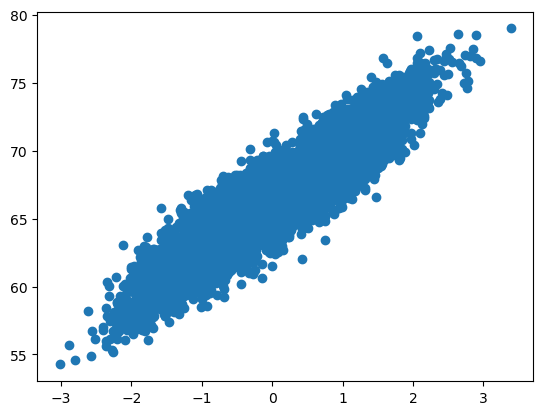

In [43]:
plt.scatter(x_train,y_train)

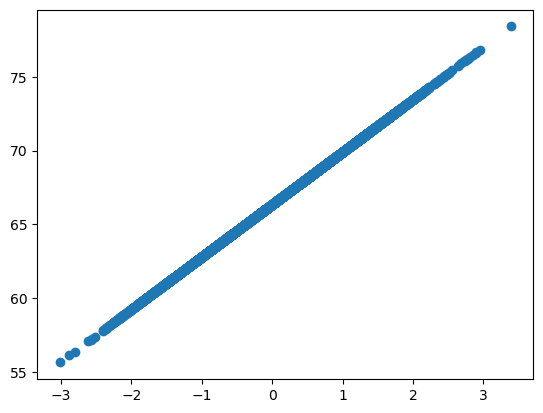

In [51]:
plt.scatter(x_train,regressor.predict(x_train))

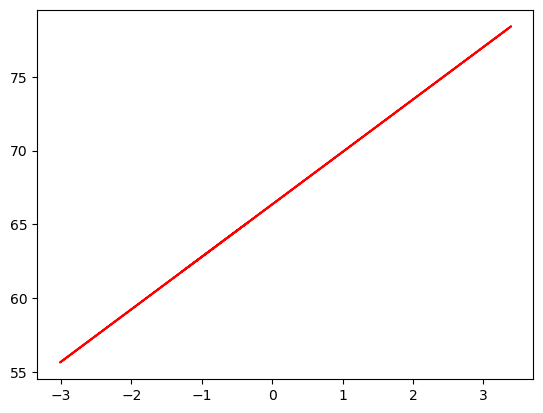

In [52]:
# Another way to see the best fit line with red color 
plt.scatter(x_train,regressor.predict(x_train))

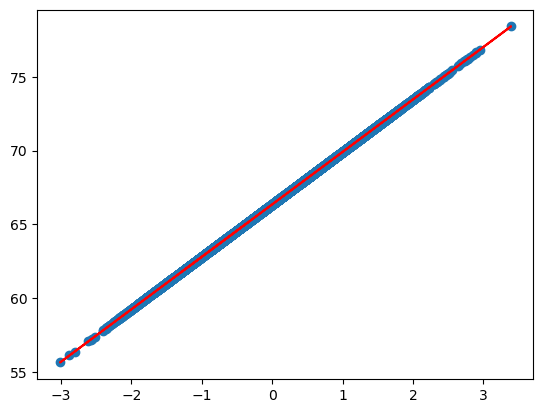

In [61]:
## IF I want to see the best fit  inside the dataset 
plt.scatter(x_train,regressor.predict(x_train))
plt.plot(x_train,regressor.predict(x_train),'r')

## Prediction of train data
1. Predicted height output=intercept +coef_(Weights)
2. y_pred_train=66.3596814074891+3.55479288(x_train)

### Prediction of test data
1.predicted height output= intercept +coef_(Weights)
2. y_pred_test=66.3596814074891+3.55479288(x_test)

In [63]:
## Prediction for the test data
y_pred_test=regressor.predict(x_test)

In [64]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

## Performance metrics MAE,MSE,RMSE

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [68]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1123619484741476
1.1588656330992095
1.4533966934303062


## Accuracy of the model R Squared and adjusted R squared
## R Square
Formula

**R^2= 1- SSR/SST**


- R^2 = coefficient or slop
- SSR = sum of residuals
- SST = total sum of squares

In [69]:
 from sklearn.metrics import r2_score

In [70]:
score=r2_score(y_test,y_pred_test)

In [71]:
score

0.8578120230894554

## Adjusted r square
**Adjusted R2= 1-[(1-R2)*(n-1)/(n-k-1)]**

where:
    
    
- R2: The R2 of the model
- n: the number of observations
- k: the number of the predictor varibales

In [76]:
# Display Adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8577408579358465

In [78]:
regressor

LinearRegression()

In [79]:
scaler

StandardScaler()